Spaceship Titanic challenge Description

Here the problem is around Spaceship Titanic that collided with spacetime anomaly and is required
predict which passengers were transported to an alternative dimension using records recovered from
spaceship's damaged computer system!

Total passengers around 12970
train set - 8693
test set - 4277

Data columns :

| PassengerId | HomePlanet | CryoSleep | Cabin | Destination | Age | VIP | RoomService | FoodCourt | ShoppingMall | Spa | VRDeck | Name | Transported |


In [2]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# First, load train dataset
train_data = pd.read_csv("resources/train_02.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
# First, load test dataset
test_data = pd.read_csv("resources/test_02.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Exploratory Data Analysis and Visualization

In [5]:
# Checkout columns data type and non-null rows - train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
# Checkout columns data type and non-null rows - test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


Probably is necessary delete null rows or apply some fill methodology to solve missing data and could be suitable convert some columns' data type from object to corresponding data type
to improve understanding and save memory.

<BarContainer object of 12 artists>

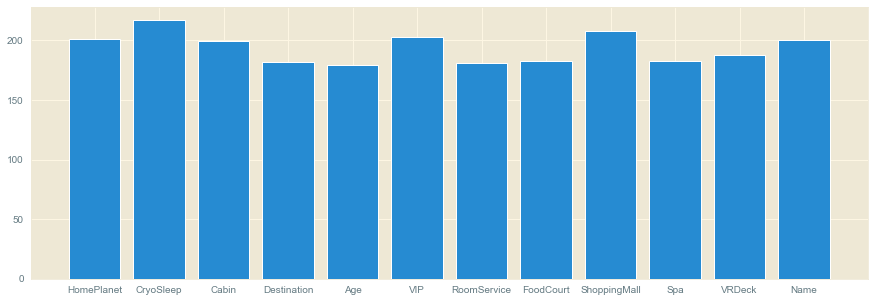

In [7]:
# Here is good idea checkout missing data using bar plot - train
nulls_train = list(train_data.isna().sum())
plt.style.use('Solarize_Light2')
plt.figure(figsize=(15,5))
plt.bar(train_data.columns.tolist()[1:-1], nulls_train[1:-1])

<BarContainer object of 12 artists>

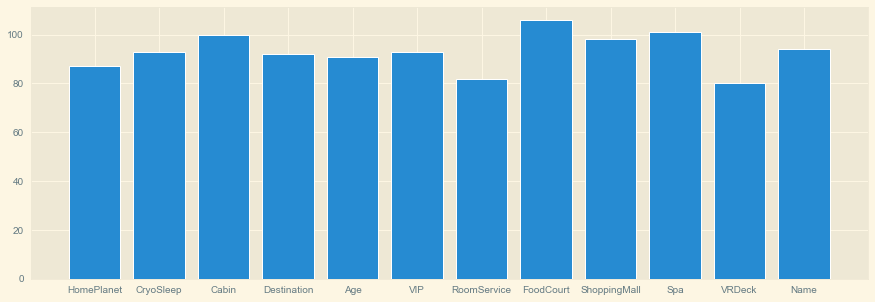

In [8]:
# Here is good idea checkout missing data using bar plot - test
nulls_test = list(test_data.isna().sum())
plt.style.use('Solarize_Light2')
plt.figure(figsize=(15,5))
plt.bar(test_data.columns.tolist()[1:], nulls_test[1:])

Here, is clear that exist a lot of rows without information so in next section named "data preprocessing" will be fill missing data using different statistical values for it (average or mode for categorical variables).

# HomePlanet column visualization

[Text(0.5, 1.0, 'test')]

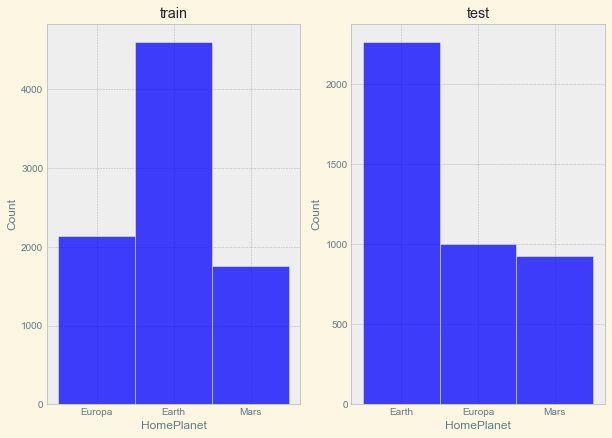

In [9]:
# Bar plot to visualize the most common home planet
plt.style.use('Solarize_Light2')
fig, axs = plt.subplots(1, 2, figsize=(10, 7))
sns.histplot(data=train_data, x="HomePlanet",ax=axs[0]).set(title="train")
sns.histplot(data=test_data, x="HomePlanet",ax=axs[1]).set(title="test")

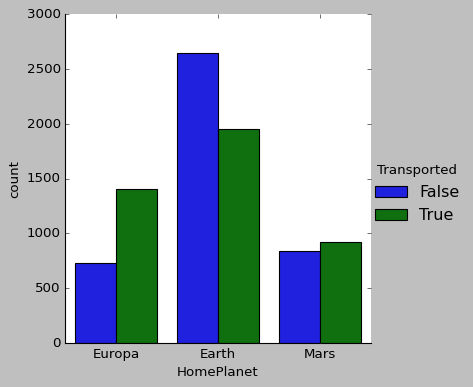

In [10]:
# Analyze proportion transported for every home planet
# Bar plot to visualize the most common home planet
plt.style.use('Solarize_Light2')
sns.catplot(x="HomePlanet", kind="count", data=train_data, hue="Transported")

In [11]:
# calculate proportions transported from every planet
train_p = train_data.groupby("HomePlanet")["Transported"].mean()
train_p

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64

conclusions

- From last bar plot is evident that most of the passengers transported was from Earth, followed by Europa and finally Mars.
- Although from Heart was the most of the passengers, the most proportion was from Europa.

# Cabin column visualization
format for this column is deck/num/side
where side can be P (Port) or S (Starboard)

<Figure size 1200x800 with 0 Axes>

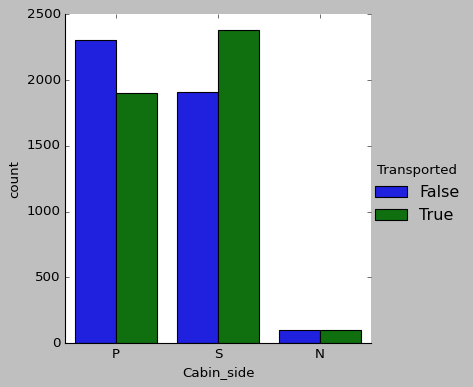

In [16]:
# Here the idea is analyzed if some side may have been affected most affected by phenomenon
train_data["Cabin"].fillna("N/N/N", inplace=True)
test_data["Cabin"].fillna("N/N/N", inplace=True)

deck_num_side = train_data["Cabin"].apply(lambda x: x.split("/"))
train_data["Cabin_side"] =list(map(lambda x: x[-1], deck_num_side))

plt.style.use('Solarize_Light2')
plt.figure(figsize=(15, 10))
sns.catplot(x="Cabin_side", kind="count", data=train_data, hue="Transported")


# Destination visualization

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


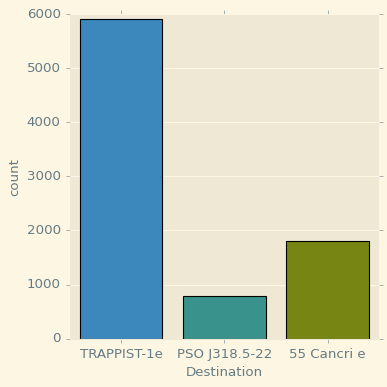

In [20]:
# Exist three different destinations, so may be important observe the most desired destination
destinations = train_data["Destination"].unique()
print(destinations)

plt.style.use('Solarize_Light2')
sns.catplot(x="Destination", kind="count", data=train_data)

# Age visualization
Here, could be interesting visualize age distribution for passengers transported or not.

[Text(0.5, 1.0, 'Not Transported')]

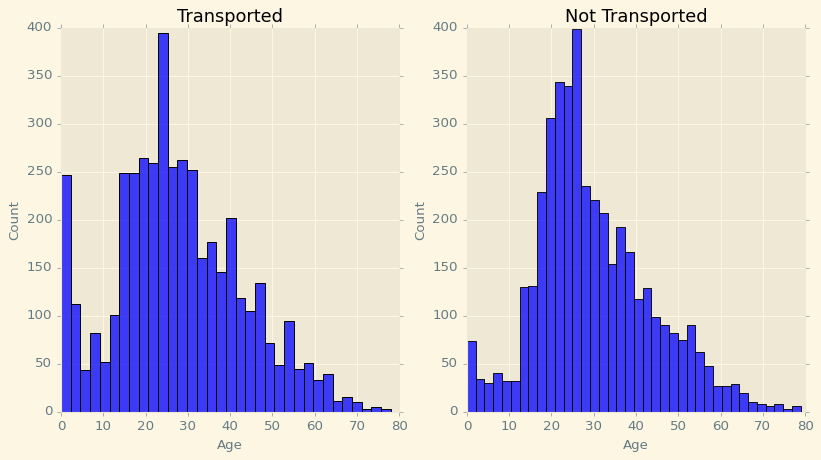

In [24]:
train_data_true = train_data[train_data.Transported == True]
train_data_false = train_data[train_data.Transported == False]

fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.histplot(x="Age", data=train_data_true, ax=ax[0]).set(title="Transported")
sns.histplot(x="Age", data=train_data_false, ax=ax[1]).set(title="Not Transported")